In [1]:
# Importing libraries -
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.linear_model import LinearRegression
#plt.rc('figure', figsize=(14.0, 8.0))

In [2]:
# Loading the dataset -
df = pd.read_csv(r"Jamboree_Admission.csv")

In [3]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

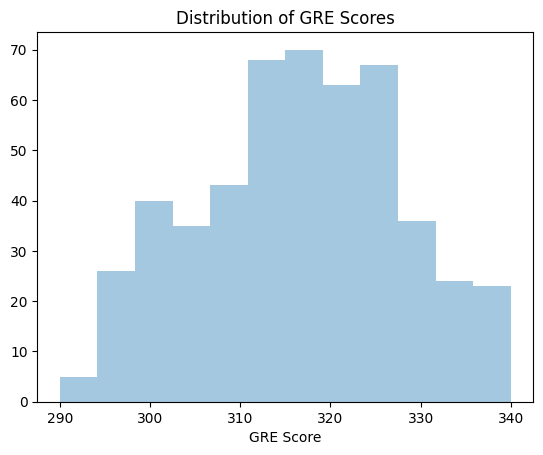

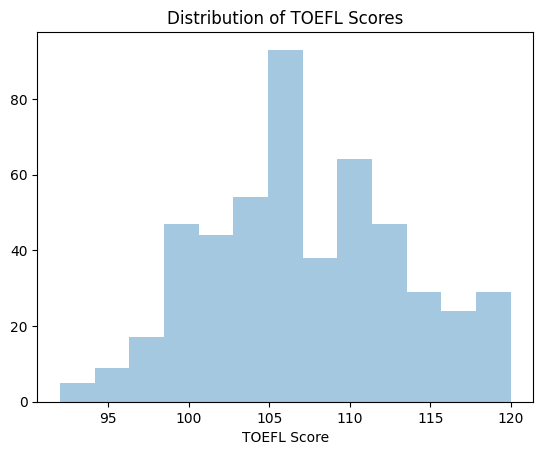

In [6]:
fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()
fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

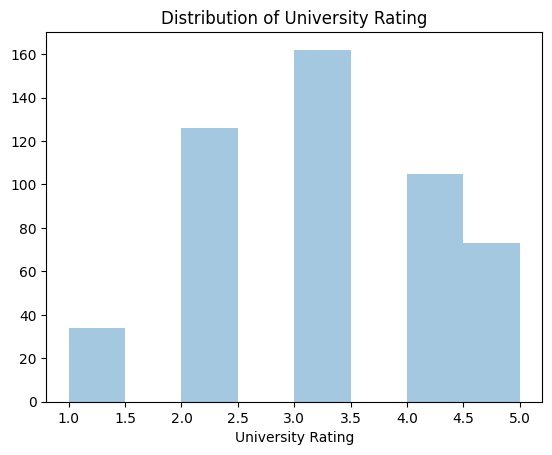

In [7]:
fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()



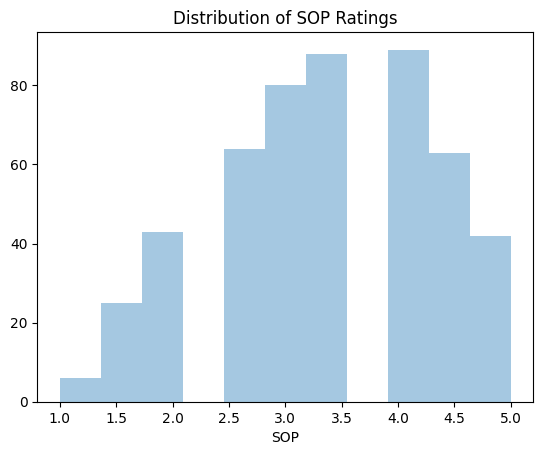

In [8]:
fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()


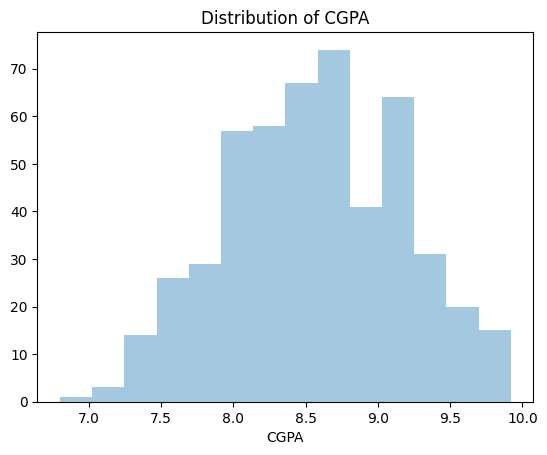

In [9]:
fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

It is clear from the distributions, students with varied merit apply for the university.

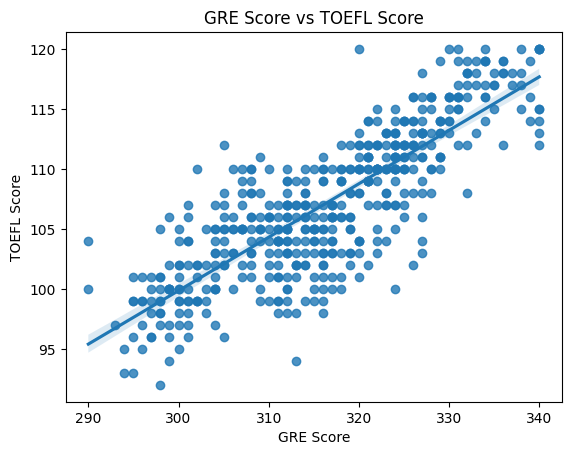

In [10]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

People with higher GRE Scores also have higher TOEFL Scores which is justied because both TOEFL and GRE have a verbal section which although not similar are relatable

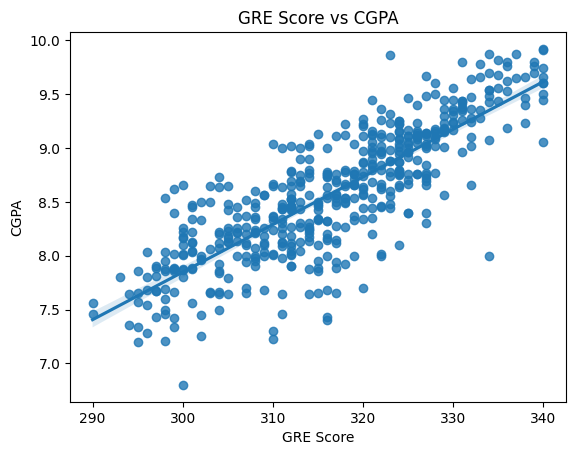

In [11]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working


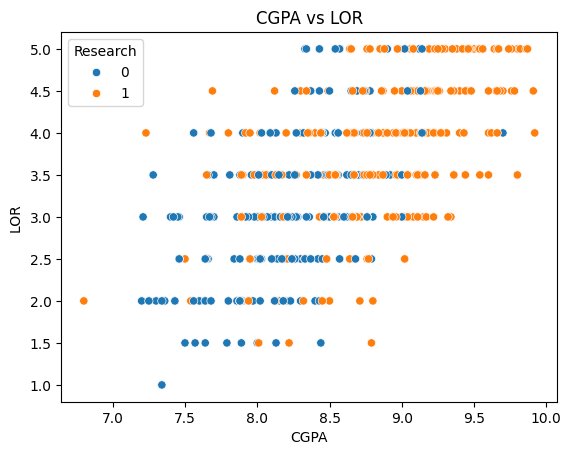

In [12]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("CGPA vs LOR")
plt.show()

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is usually related with a good LOR which might be justi ed by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs

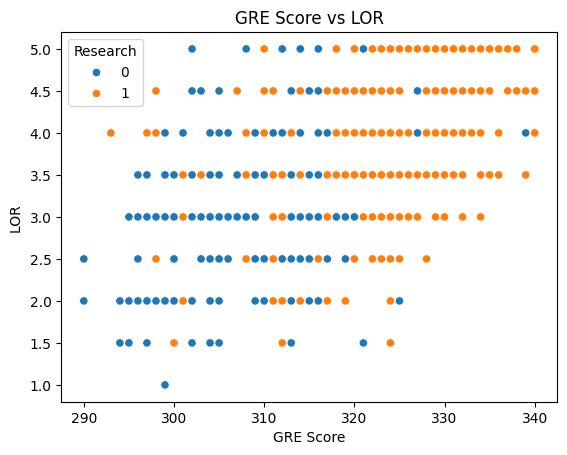

In [13]:
fig = sns.scatterplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs LOR")
plt.show()

GRE scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE scores


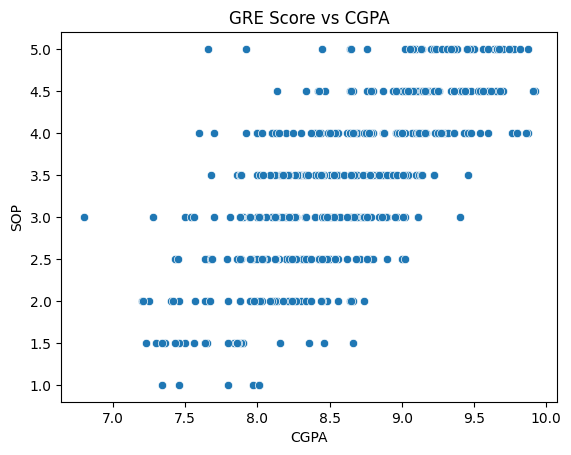

In [14]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()


CGPA and SOP are not that related because Statement of Purpose is related to academic performance, but since people with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight move towards higher CGPA as along with good SOPs

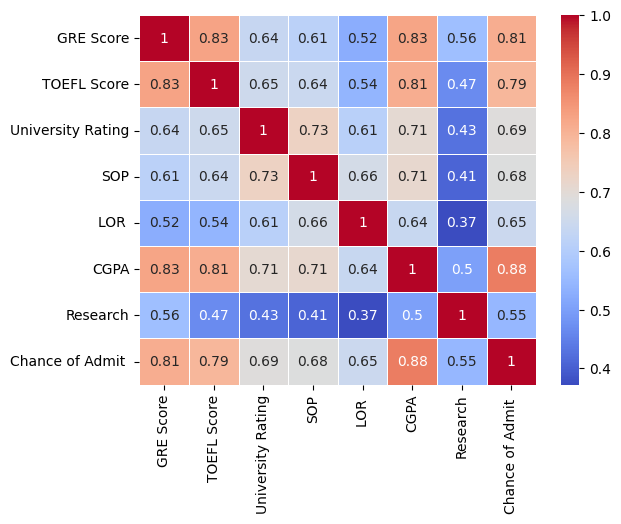

In [15]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm' , linewidths=.5)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']

In [17]:
X2 = sm.add_constant(X)
model = sm.OLS(y, X2)
results = model.fit()

# 1) Multicollinearity check by VIF score
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
print(vif.round(1))


   VIF Factor           features
0      1511.5              const
1         4.5          GRE Score
2         3.9        TOEFL Score
3         2.6  University Rating
4         2.8                SOP
5         2.0               LOR 
6         4.8               CGPA
7         1.5           Research


In [18]:
# 2) The mean of residuals is nearly zero
print('Mean of Residuals: ', np.mean(results.resid))

Mean of Residuals:  1.4290790772975015e-15


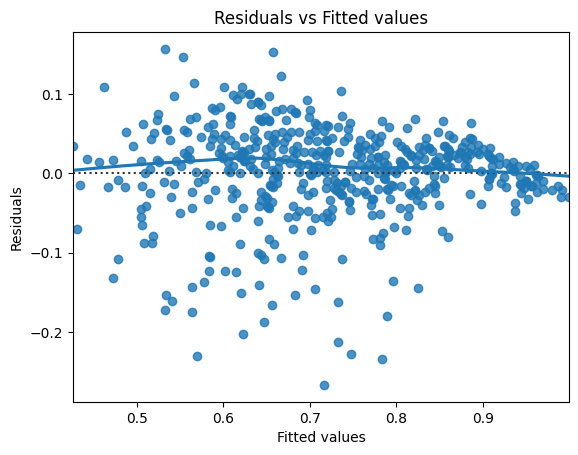

In [19]:
# 3) Linearity of variables (no pattern in the residual plot)
sns.residplot(x=results.fittedvalues, y=results.resid, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

p-value of Breusch-Pagan test: 7.633732994406747e-05


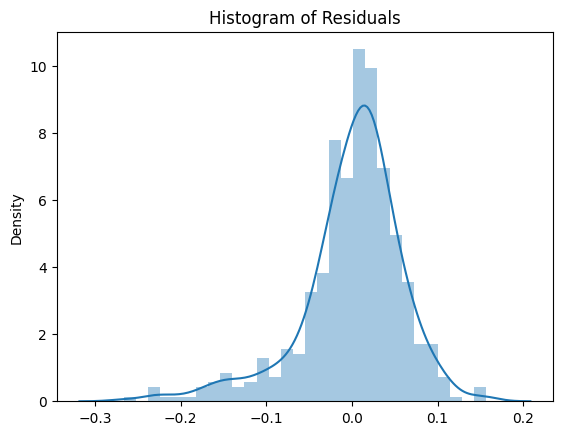

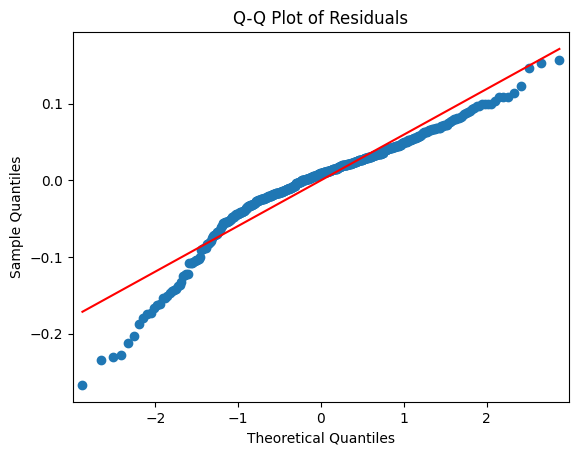

In [20]:
# 4) Test for Homoscedasticity
_, pval, __, f_pval = sm.stats.diagnostic.het_breuschpagan(results.resid, results.model.exog)
print('p-value of Breusch-Pagan test:', pval)

# 5) Normality of residuals
sns.distplot(results.resid)
plt.title('Histogram of Residuals')
plt.show()

sm.qqplot(results.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Linear Regression

In [21]:
# Create a StandardScaler instance
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Print results
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.04209602796543788
Mean Squared Error: 0.003456529699990893
Root Mean Squared Error: 0.05879225884409352


# Lasso Regression

In [22]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print('Lasso - Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lasso))
print('Lasso - Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lasso))
print('Lasso - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))


Lasso - Mean Absolute Error: 0.07969512217267317
Lasso - Mean Squared Error: 0.010131259051370998
Lasso - Root Mean Squared Error: 0.10065415565872578


# Ridge Regression

In [23]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1) 
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print('Ridge - Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ridge))
print('Ridge - Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ridge))
print('Ridge - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))


Ridge - Mean Absolute Error: 0.042096165648830314
Ridge - Mean Squared Error: 0.0034564031029093007
Ridge - Root Mean Squared Error: 0.05879118218669617
